<a href="https://colab.research.google.com/github/bhartikapoor9634/Computer_Vision_Projects/blob/main/Tomato_Leaf_Disease_Detection_using_CNN_and_ResNet152_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading Dataset File from Kaggle**

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/"
!kaggle datasets download kaustubhb999/tomatoleaf

tomatoleaf.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
! unzip "tomatoleaf.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from PIL import Image

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Lambda
from keras.engine.base_layer import Layer

from tensorflow.keras import Sequential
from keras.models import load_model
from tensorflow.keras.layers import Flatten, Dense,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D,GlobalMaxPooling2D, GlobalAveragePooling2D

from tensorflow.keras.applications import ResNet152V2


# **Preparing Training and Testing Data**

In [ ]:
train_augdata = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_augdata = ImageDataGenerator(rescale=1./255)

train_augdata = train_augdata.flow_from_directory(
        '/content/tomato/train',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')

test_augdata = test_augdata.flow_from_directory(
        '/content/tomato/val',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


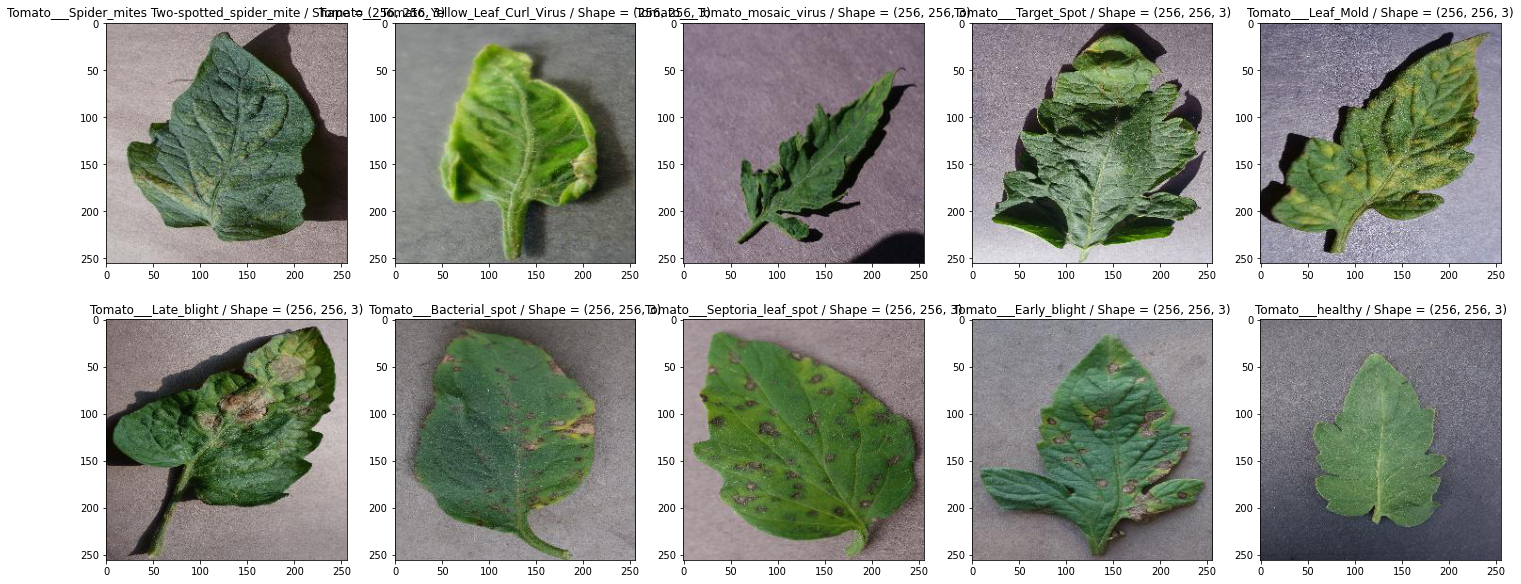

In [ ]:
# Training data visualization

classes = os.listdir('/content/tomato/train')

plt.figure(figsize=(25,10))

for i in enumerate(classes):
    pic = os.listdir('/content/tomato/train/'+i[1])[0]
    image = Image.open('/content/tomato/train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(2,5,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()


# **Building CNN model**

In [ ]:
cnn_model=Sequential()


cnn_model.add(layers.Conv2D(filters=32, kernel_size=3,padding ='Same',activation = 'relu',input_shape=(256,256,3)))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D(pool_size=2, strides=2))

cnn_model.add(layers.Conv2D(filters=32, kernel_size=3,padding ='Same',activation = 'relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(layers.MaxPooling2D(pool_size=2, strides=2))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(BatchNormalization())

cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))

cnn_model.add(layers.Dense(10, activation ='softmax'))

cnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                      

In [ ]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(x = train_augdata, 
                            validation_data=test_augdata,
                            epochs=15,
                            shuffle=True)

Epoch 1/15
313/313 [==============================] - 138s 439ms/step - loss: 0.2023 - accuracy: 0.5625 - val_loss: 0.1727 - val_accuracy: 0.6410
Epoch 2/15
313/313 [==============================] - 136s 435ms/step - loss: 0.1079 - accuracy: 0.7947 - val_loss: 0.2300 - val_accuracy: 0.6020
Epoch 3/15
313/313 [==============================] - 137s 437ms/step - loss: 0.0814 - accuracy: 0.8519 - val_loss: 0.1346 - val_accuracy: 0.7820
Epoch 4/15
313/313 [==============================] - 135s 433ms/step - loss: 0.0669 - accuracy: 0.8818 - val_loss: 0.2096 - val_accuracy: 0.6830
Epoch 5/15
313/313 [==============================] - 136s 436ms/step - loss: 0.0583 - accuracy: 0.9015 - val_loss: 0.1002 - val_accuracy: 0.8190
Epoch 6/15
313/313 [==============================] - 137s 436ms/step - loss: 0.0507 - accuracy: 0.9146 - val_loss: 0.0934 - val_accuracy: 0.8390
Epoch 7/15
313/313 [==============================] - 136s 435ms/step - loss: 0.0449 - accuracy: 0.9258 - val_loss: 0.2471 -

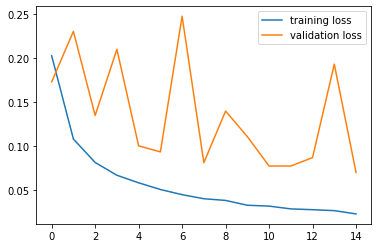

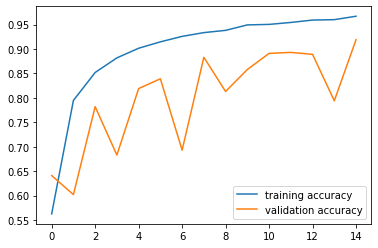

In [ ]:
# plot the loss
plt.plot(cnn_history.history['loss'], label='training loss')
plt.plot(cnn_history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(cnn_history.history['accuracy'], label='training accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


Model Evaluation

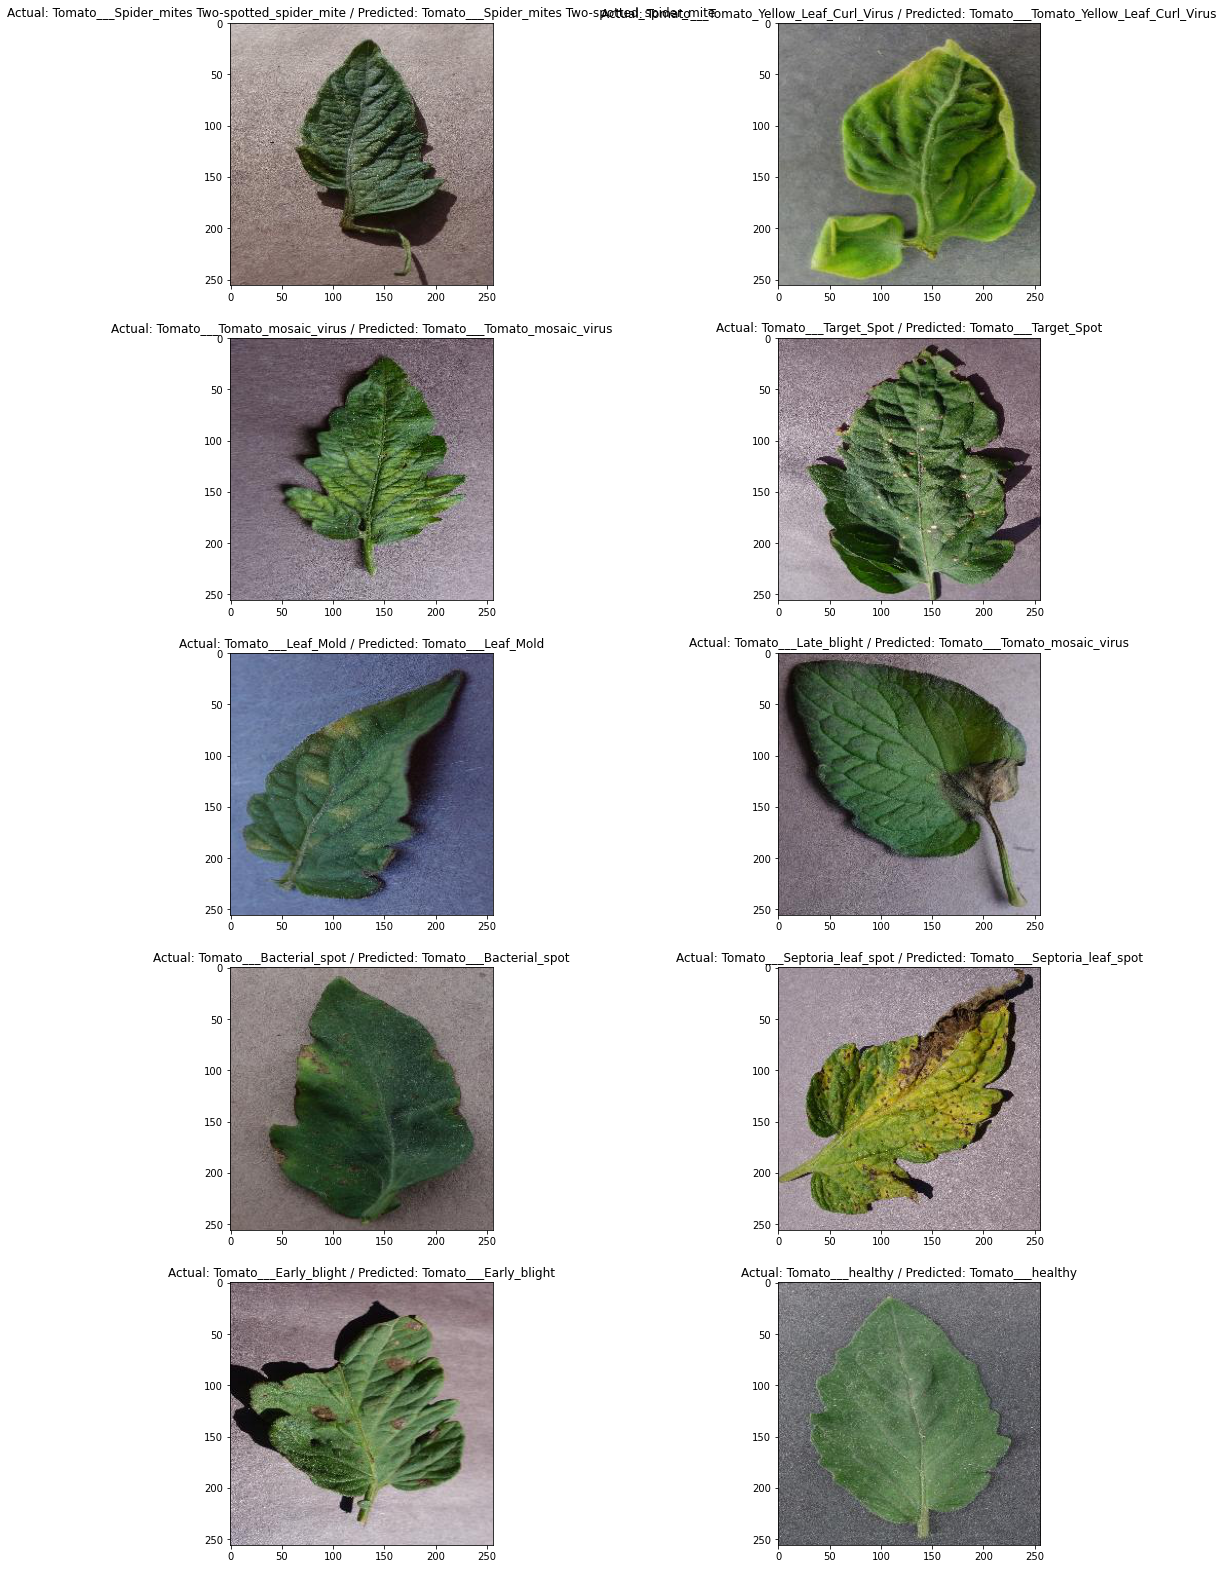

In [ ]:
test_dir = os.listdir('/content/tomato/val')

plt.figure(figsize=(18,28))

for i in enumerate(train_dir):
    test_img = os.listdir('/content/tomato/val/'+i[1])
    test_img = train_img[np.random.randint(len(test_img)-1)]
    test_img = Image.open('/content/tomato/val/'+i[1]+'/'+test_img)
    test_img = np.asarray(test_img)
    
    pred = np.argmax(cnn_model.predict(test_img.reshape(-1,256,256,3)/255))
    for j in list(enumerate(list(test_augdata.class_indices.keys()))):
        if pred == j[0]:
            prediction =  j[1]
    
    plt.subplot(5,2,i[0]+1)
    plt.title('Actual: {0} / Predicted: {1}'.format(i[1], prediction))
    plt.imshow(test_img)
plt.show()

In [ ]:
test_cnn_score, test_cnn_acc = cnn_model.evaluate(test_augdata, batch_size=32)                       
print('Test score:', test_cnn_score)
print('Test accuracy:', test_cnn_acc)

32/32 [==============================] - 2s 71ms/step - loss: 0.0701 - accuracy: 0.9190
Test score: 0.0700649693608284
Test accuracy: 0.9190000295639038


# **RESNET152 Model**

In [ ]:
resnet_base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)

for layers in resnet_base_model.layers[:140]:
    layers.trainable = False
for layers in resnet_base_model.layers[140:]:
    layers.trainable = True
    

x = resnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

resnet_model = Model(inputs=resnet_base_model.input, outputs=prediction)
resnet_model.summary()


In [ ]:
resnet_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')
res_history=model.fit(train_augdata, batch_size=32, epochs=15, validation_data=test_augdata)

Epoch 1/15
313/313 [==============================] - 280s 847ms/step - loss: 0.5597 - accuracy: 0.8244 - val_loss: 0.2818 - val_accuracy: 0.8990
Epoch 2/15
313/313 [==============================] - 254s 810ms/step - loss: 0.1108 - accuracy: 0.9663 - val_loss: 0.1779 - val_accuracy: 0.9430
Epoch 3/15
313/313 [==============================] - 254s 810ms/step - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.1868 - val_accuracy: 0.9390
Epoch 4/15
313/313 [==============================] - 254s 810ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.1094 - val_accuracy: 0.9590
Epoch 5/15
313/313 [==============================] - 254s 810ms/step - loss: 0.0333 - accuracy: 0.9902 - val_loss: 0.0774 - val_accuracy: 0.9740
Epoch 6/15
313/313 [==============================] - 254s 809ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.1099 - val_accuracy: 0.9630
Epoch 7/15
313/313 [==============================] - 254s 810ms/step - loss: 0.0214 - accuracy: 0.9943 - val_loss: 0.0756 -

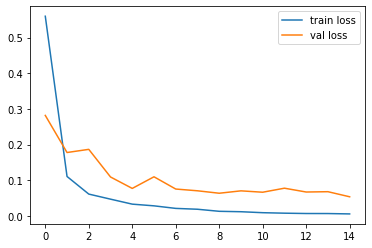

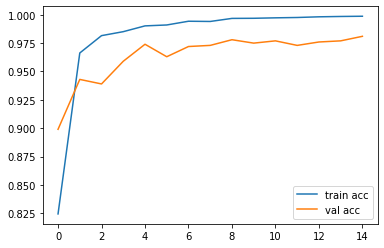

In [ ]:
# plot the loss
plt.plot(res_history.history['loss'], label='train loss')
plt.plot(res_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(res_history.history['accuracy'], label='train acc')
plt.plot(res_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


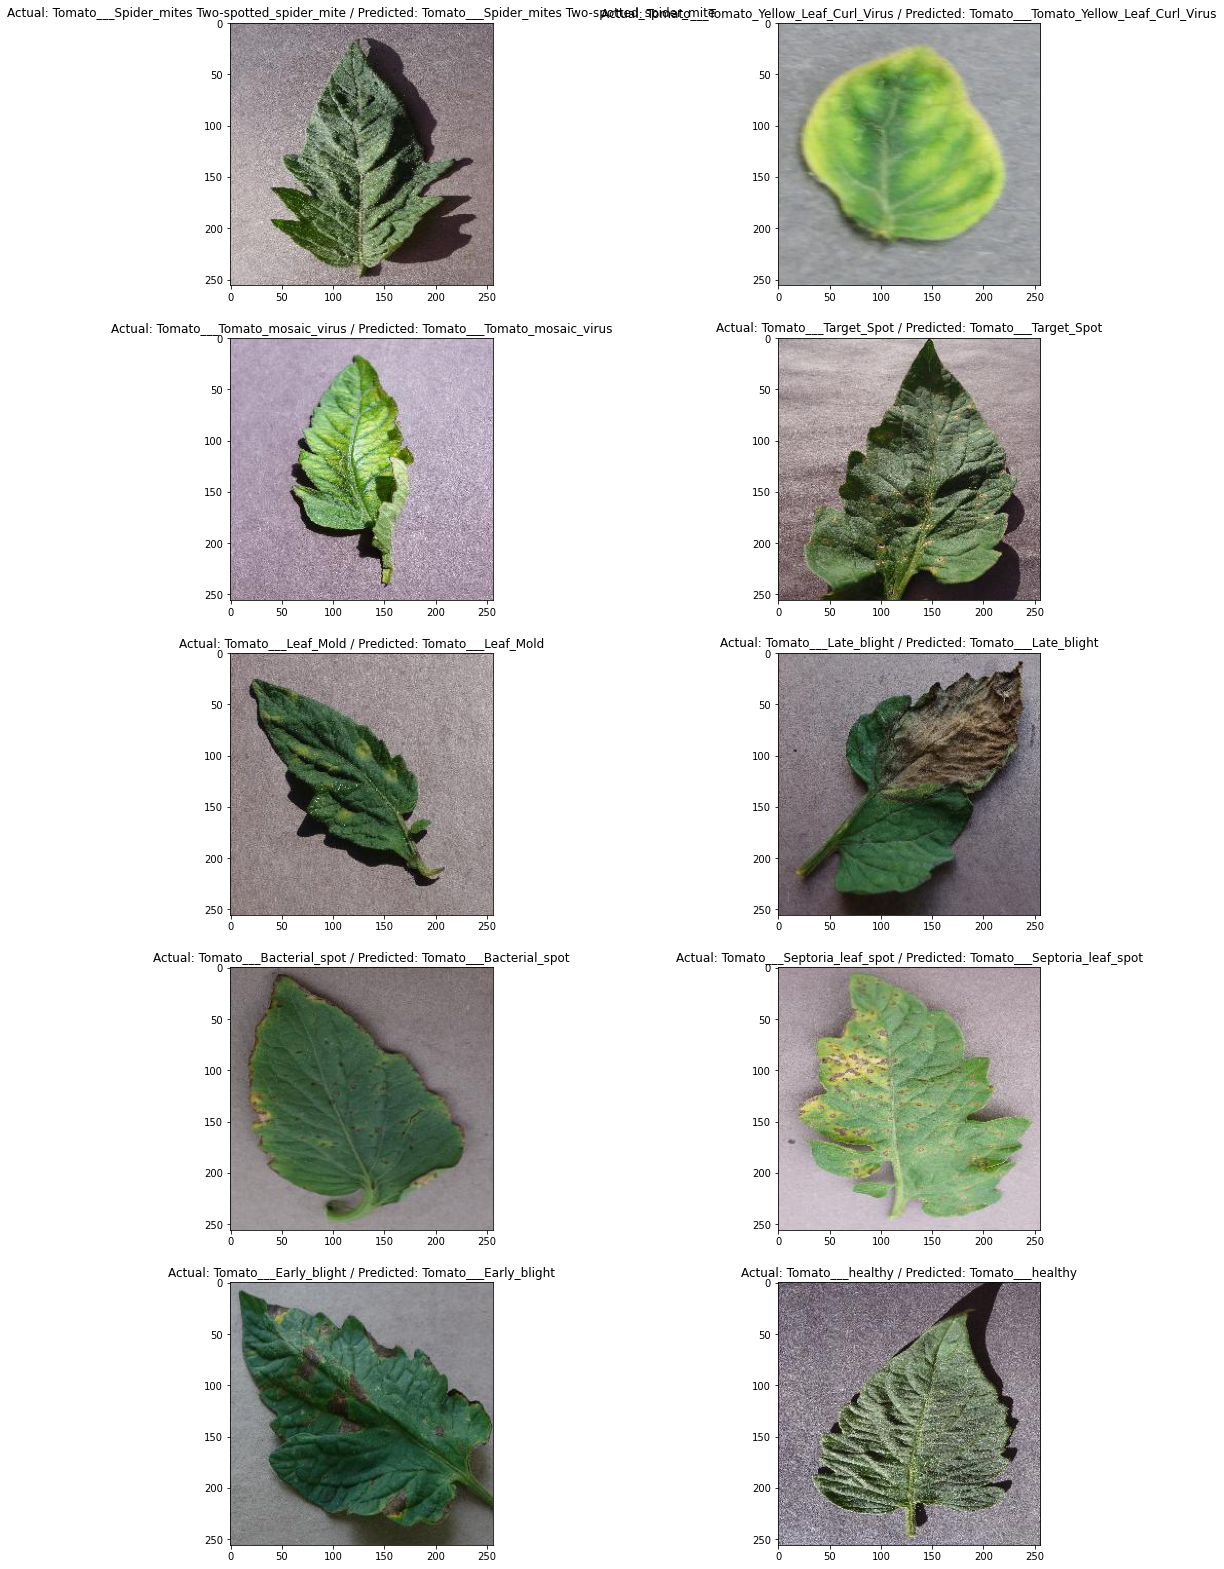

In [ ]:
test_dir = os.listdir('/content/tomato/val')

plt.figure(figsize=(18,28))

for i in enumerate(train_dir):
    test_img = os.listdir('/content/tomato/val/'+i[1])
    test_img = train_img[np.random.randint(len(test_img)-1)]
    test_img = Image.open('/content/tomato/val/'+i[1]+'/'+test_img)
    test_img = np.asarray(test_img)
    
    pred = np.argmax(resnet_model.predict(test_img.reshape(-1,256,256,3)/255))
    for j in list(enumerate(list(test_augdata.class_indices.keys()))):
        if pred == j[0]:
            prediction =  j[1]
    
    plt.subplot(5,2,i[0]+1)
    plt.title('Actual: {0} / Predicted: {1}'.format(i[1], prediction))
    plt.imshow(test_img)
plt.show()

In [ ]:
test_resnet_score, test_resnet_acc = model.evaluate(test_augdata, batch_size=32)                       
print('Test score:', test_resnet_score)
print('Test accuracy:', test_resnet_acc)

32/32 [==============================] - 10s 308ms/step - loss: 0.0539 - accuracy: 0.9810
Test score: 0.05390331894159317
Test accuracy: 0.9810000061988831
